# Testing of JAXGeometry

In [1]:
from jaxgeometry.manifolds import Euclidean
from jaxgeometry.setup import dts
import jaxgeometry.statistics as jstat
import jaxgeometry.stochastics as jstoch
import jax.numpy as jnp

2023-09-28 10:31:30.678956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
RN = Euclidean(N=2)
jstoch.Brownian_coords(RN)
jstat.diffusion_mean(RN)

using M.Exp for Logarithm


In [3]:
RN.Gamma_g(jnp.ones(2))

Array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]], dtype=float32)

In [4]:
theta = jnp.linspace(0,2*jnp.pi, 100)

X_obs = (jnp.array([jnp.cos(theta), jnp.sin(theta)]).T, jnp.zeros(100))
x0 = (jnp.zeros(2), jnp.zeros(1))

In [5]:
%time (thetas,chart,log_likelihood,log_likelihoods,mu_bridge) = RN.diffusion_mean(X_obs,num_steps=10, N=100)

Step 0 | T: 1.126579e+01 | T: ((Array([-0.00661544, -0.01513765], dtype=float32), Array(0.20999993, dtype=float32)), Array([0.], dtype=float32))
Step 1 | T: 1.017586e+01 | T: ((Array([ 0.00288247, -0.00546564], dtype=float32), Array(0.219929, dtype=float32)), Array([0.], dtype=float32))
Step 2 | T: 9.250527e+00 | T: ((Array([0.01130004, 0.00355135], dtype=float32), Array(0.22974779, dtype=float32)), Array([0.], dtype=float32))
Step 3 | T: 8.462132e+00 | T: ((Array([0.01800781, 0.01153711], dtype=float32), Array(0.2394229, dtype=float32)), Array([0.], dtype=float32))
Step 4 | T: 7.787341e+00 | T: ((Array([0.02262361, 0.01815194], dtype=float32), Array(0.2489264, dtype=float32)), Array([0.], dtype=float32))
Step 5 | T: 7.206736e+00 | T: ((Array([0.02517146, 0.0231924 ], dtype=float32), Array(0.25823545, dtype=float32)), Array([0.], dtype=float32))
Step 6 | T: 6.704495e+00 | T: ((Array([0.02595332, 0.02663462], dtype=float32), Array(0.2673318, dtype=float32)), Array([0.], dtype=float32))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


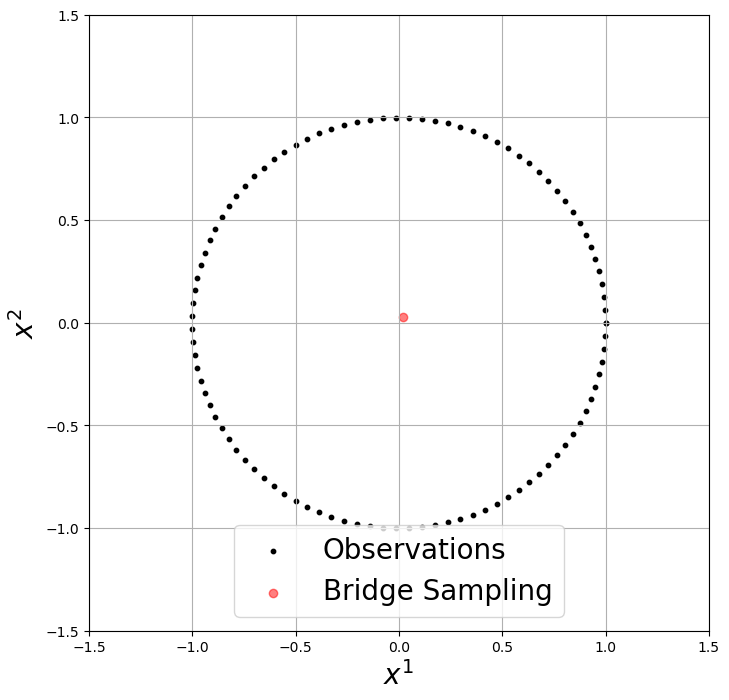

In [6]:
# Creating the plot.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_obs[0][:,0], X_obs[0][:,1], s=10, color='black', label='Observations')
#ax.scatter(mu_true_est[0][:,0], mu_true_est[0][:,1], s=20*t_true_est, color='orange', label=r'$\nabla_{y}\ln p(x,y,t)$')
ax.scatter(mu_bridge[-1][0][0], mu_bridge[-1][0][1], color='red', label=r'Bridge Sampling',alpha=.5)
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
#ax.set_title(r'Diffusion Mean Estimates')
ax.legend(loc='lower center', fontsize=20)
ax.grid()
fig.savefig('Figures/r2_estimates.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

In [7]:
RN.mlxt_hk(X_obs)

((Array([1.0000009e-02, 1.9073486e-08], dtype=float32),
  Array([0.], dtype=float32)),
 Array(0.49995, dtype=float32))

In [8]:
RN.diffusion_mean_ll((jnp.zeros(2), jnp.zeros(1)), jnp.array([.5], dtype=jnp.float32), X_obs, N=100)

Array(-2.4715827, dtype=float32)

In [9]:
from jax import vmap

In [10]:
jnp.mean(vmap(lambda x: RN.log_hk((jnp.zeros(2), jnp.zeros(1)), x, jnp.ones(1)*0.5))(X_obs))

Array(-1.1347299, dtype=float32)

In [11]:
thetas

(Array([0.02142598, 0.02893284], dtype=float32),
 Array(0.29322034, dtype=float32))

In [12]:
jstat.diffusion_mean(RN)

In [13]:
x = (jnp.zeros(2), jnp.zeros(1))
y = (jnp.ones(2), jnp.zeros(1))
dt = dts()

v = RN.Log(x,y)
curve = RN.geodesic(x,v[0],dts())
parallel_transport = RN.parallel_transport(v[0],dts(),x[0],x[1],jnp.zeros(2))

ValueError: All input arrays must have the same shape.

In [14]:
((x[0]+jnp.cumsum(dt)[:,None]*v[0]).T).shape

(2, 100)

In [15]:
jnp.tile(v[0], (1, len(dt))).shape

(1, 100)

In [16]:
len(dt)

100

In [17]:
print((x[0]+jnp.cumsum(dt)[:,None]*v[0]).shape)
print(jnp.tile(v[0], (len(dt), 1)).shape)

(100, 2)
(100, 1)


In [18]:
jnp.cumsum(dt)

Array([0.01      , 0.02      , 0.03      , 0.04      , 0.05      ,
       0.06      , 0.07      , 0.08      , 0.09      , 0.09999999,
       0.10999999, 0.12      , 0.13      , 0.14      , 0.15      ,
       0.16      , 0.17      , 0.17999999, 0.19      , 0.19999999,
       0.21      , 0.21999998, 0.22999999, 0.24      , 0.25      ,
       0.26      , 0.26999998, 0.28      , 0.29      , 0.3       ,
       0.31      , 0.32      , 0.32999998, 0.34      , 0.35      ,
       0.35999998, 0.36999997, 0.38      , 0.39      , 0.39999998,
       0.40999997, 0.42      , 0.42999998, 0.43999997, 0.44999996,
       0.45999998, 0.46999997, 0.48      , 0.48999998, 0.5       ,
       0.51      , 0.52      , 0.53      , 0.53999996, 0.54999995,
       0.56      , 0.57      , 0.58      , 0.59      , 0.6       ,
       0.61      , 0.62      , 0.63      , 0.64      , 0.65      ,
       0.65999997, 0.66999996, 0.68      , 0.69      , 0.7       ,
       0.71      , 0.71999997, 0.72999996, 0.73999995, 0.74999

In [19]:
from jax import vmap
val = vmap(lambda v: RN.norm(x,v))(curve[1][:,1])

NameError: name 'curve' is not defined

In [20]:
jnp.diff(curve[0])

NameError: name 'curve' is not defined

In [21]:
(val[1:]+val[:-1])*0.5

NameError: name 'val' is not defined

In [22]:
RN.dist(x,y)

Array(1.4142135, dtype=float32)

## VSM

In [12]:
file_path = 'models/R2/vsm/'

In [13]:
from jaxgeometry.statistics.score_matching import model_loader

In [14]:
state = model_loader.load_model(file_path)

In [15]:
#jax
import jax.numpy as jnp
from jax import vmap, Array
from jax.nn import tanh

#haiku
import haiku as hk

#random
import random

In [20]:
from train_score import RN_s1, RN_s2

@hk.transform
def s1_model(x):

    score = RN_s1(RN.dim)

    return score(x)

@hk.transform
def s2_model(x):

    score = RN_s2(RN.dim)

    return score(x)

In [21]:
import jax
model = s1_model
rng_key = jax.random.PRNGKey(2712)
def grady_log_model(x,y,t):
    
    return model.apply(state.params,rng_key, jnp.hstack((x[0], y[0], t)))

def gradt_log_model(x,y,t):
    
    grad_val = grady_log_model(x, y, t)
            
    return 0.5*(jnp.dot(grad_val, grad_val)+M.div(y,lambda y: grady_log_model(x, y, t)))

In [22]:
#Source: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / jnp.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return jnp.arccos(jnp.clip(jnp.dot(v1_u, v2_u), -1.0, 1.0))

In [23]:
#Plot source: https://stackoverflow.com/questions/44594011/heat-map-on-unit-sphere
#Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
# Creating the theta and phi values
intervals = 1000

min_x = -2.0
max_x = 2.0
min_t = 1e-8
max_t = 1.0

x1 = jnp.linspace(min_x, max_x, intervals)
x2 = jnp.linspace(min_x, max_x, intervals)
t1 = jnp.linspace(min_t, max_t, intervals)

# Creating the coordinate grid for the unit sphere.
X1_heat, X2_heat = jnp.meshgrid(x1, x2)
X_heat = jnp.transpose(jnp.concatenate((X1_heat.reshape(1, intervals, intervals), 
                     X2_heat.reshape(1, intervals, intervals))), axes=(1,2,0))

theoretical_grad = lambda y,t: RN.grady_log_hk(x0, (y, jnp.zeros(1)), t)[0]
numerical_grad = lambda y,t: grady_log_model(x0, (y, jnp.zeros(1)), t)
heat_map = vmap(lambda x2,t: vmap(lambda x1: angle_between(theoretical_grad(x1,t),
                                                         numerical_grad(x1,t)))(x2))(X_heat,t1)

# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heat_map, cmap=mpl.cm.inferno, interpolation='nearest', aspect='auto',
          extent=[min_x,max_x,min_x,max_x])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_title(r'$\cos^{-1}\frac{\langle s_{\theta}(x,y,t), \nabla_{y}\ln p(x,y,t) \rangle_{\mathbb{R}^{2}}}{||s_{\theta}(x,y,t)||_{\mathbb{R}^{2}}\cdot||\nabla_{y}\ln p(x,y,t)||_{\mathbb{R}^{2}}}$',
            fontsize=20)
m = mpl.cm.ScalarMappable(cmap=mpl.cm.inferno)
m.set_array(heat_map)
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xticks(t1[-1::-100])
ax2.set_xlabel(r'$t$')
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_yticks(t1[-1::-100])
ax3.set_ylabel(r'$t$')
cax = plt.axes([1.0, 0.075, 0.05, 0.825])
fig.colorbar(m, ax=ax, cax=cax)
ax.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
fig.savefig('Figures/r2_angle.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

ValueError: Unable to retrieve parameter 'w' for module 'rn_s1/linear' All parameters must be created as part of `init`.

### Plotting the Norm Difference in $x$

In [ ]:
#Plot source: https://stackoverflow.com/questions/44594011/heat-map-on-unit-sphere

# Creating the theta and phi values
intervals = 1000

min_x = -2.0
max_x = 2.0
min_t = 1e-8
max_t = 1.0

x1 = jnp.linspace(min_x, max_x, intervals)
x2 = jnp.linspace(min_x, max_x, intervals)
t1 = jnp.linspace(min_t, max_t, intervals)

# Creating the coordinate grid for the unit sphere.
X1_heat, X2_heat = jnp.meshgrid(x1, x2)
X_heat = jnp.transpose(jnp.concatenate((X1_heat.reshape(1, intervals, intervals), 
                     X2_heat.reshape(1, intervals, intervals))), axes=(1,2,0))

theoretical_grad = lambda y,t: RN.grady_log_hk(x0, (y, jnp.zeros(1)), t)[0]
numerical_grad = lambda y,t: grady_log_model(x0, (y, jnp.zeros(1)), t)
heat_map = vmap(lambda x2,t: vmap(lambda x1: jnp.linalg.norm(theoretical_grad(x1,t)-numerical_grad(x1,t))**2)(x2))(X_heat,t1)

# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heat_map, cmap=mpl.cm.inferno, interpolation='nearest', aspect='auto',
          extent=[min_x,max_x,min_x,max_x])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_title(r'$||s_{\theta}(x,y,t)-\nabla_{y}\ln p(x,y,t)||_{\mathbb{R}^{2}}^{2}$', fontsize=20)
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xticks(t1[-1::-100])
ax2.set_xlabel(r'$t$')
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_yticks(t1[-1::-100])
ax3.set_ylabel(r'$t$')
ax.set_ylim((min_x,max_x))
ax.set_xlim((min_x,max_x))
m = mpl.cm.ScalarMappable(cmap=mpl.cm.inferno)
m.set_array(heat_map)
cax = plt.axes([1.0, 0.075, 0.05, 0.825])
fig.colorbar(m, ax=ax, cax=cax)
ax.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
fig.savefig('Figures/r2_norm.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

In [24]:
from jaxgeometry.statistics.score_matching import diffusion_mean
from jaxgeometry.setup import *

In [25]:
def s1_grad(x,y,t):
    
    return model.apply(state.params,rng_key, jnp.hstack((x[0], y[0], t)))

def s2_grad(x,y,t):
    
    ggrad = jacfwdx(lambda y: model.apply(state.params,rng_key, jnp.hstack((x[0], y[0], t))))(y)
    
    return ggrad

diffusion_mean.initialize(RN, s1_model=s1_grad, s2_model = s2_grad)

In [26]:
theta = jnp.linspace(0,2*jnp.pi, 100)

X_obs = (jnp.array([jnp.cos(theta), jnp.sin(theta)]).T, jnp.zeros(100))
x0 = (jnp.zeros(2), jnp.zeros(1))

In [27]:
mu, T, _, _ = RN.sm_dmxt(X_obs, (jnp.ones(2), jnp.zeros(1)), jnp.array([1.0]))

ValueError: Unable to retrieve parameter 'w' for module 'rn_s1/linear' All parameters must be created as part of `init`.

NameError: name 'mu' is not defined

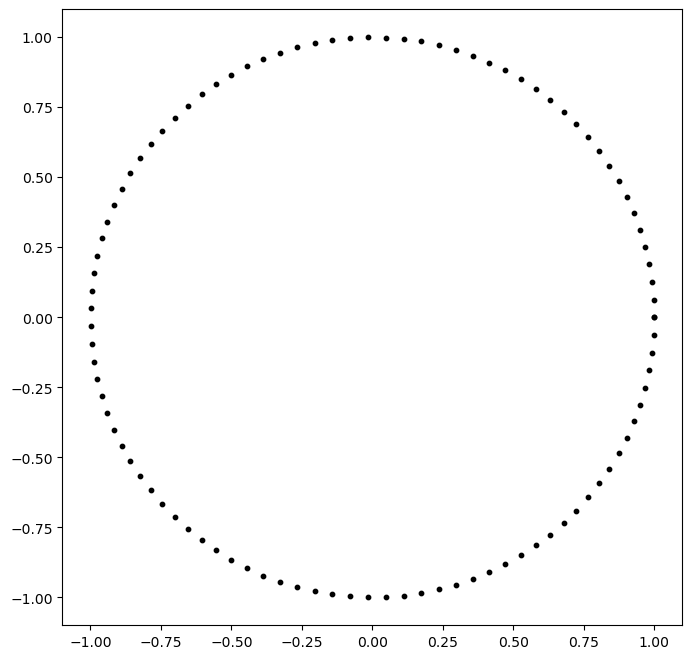

In [28]:
# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_obs[0][:,0], X_obs[0][:,1], s=10, color='black', label='Observations')
#ax.scatter(mu_true_est[0][:,0], mu_true_est[0][:,1], s=20*t_true_est, color='orange', label=r'$\nabla_{y}\ln p(x,y,t)$')
ax.scatter(mu[0][-1,0], mu[0][-1,1])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
#ax.set_title(r'Diffusion Mean Estimates')
ax.legend(loc='lower center', fontsize=20)
ax.grid()
fig.savefig('Figures/r2_estimates.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

In [29]:
print(mu)

NameError: name 'mu' is not defined

In [30]:
print(T)

1.0


## DSM

In [86]:
file_path = 'models/R2/dsm/'

In [87]:
from jaxgeometry.statistics.score_matching import model_loader

In [88]:
state = model_loader.load_model(file_path)

In [89]:
#jax
import jax.numpy as jnp
from jax import vmap, Array
from jax.nn import tanh

#haiku
import haiku as hk

#random
import random

In [90]:
from train_score import RN_s1, RN_s2

@hk.transform
def s1_model(x):

    score = RN_s1(RN.dim)

    return score(x)

@hk.transform
def s2_model(x):

    score = RN_s2(RN.dim)

    return score(x)

In [91]:
import jax
model = s1_model
rng_key = jax.random.PRNGKey(2712)
def grady_log_model(x,y,t):
    
    return model.apply(state.params,rng_key, jnp.hstack((x[0], y[0], t)))

def gradt_log_model(x,y,t):
    
    grad_val = grady_log_model(x, y, t)
            
    return 0.5*(jnp.dot(grad_val, grad_val)+M.div(y,lambda y: grady_log_model(x, y, t)))

In [92]:
#Source: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / jnp.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return jnp.arccos(jnp.clip(jnp.dot(v1_u, v2_u), -1.0, 1.0))

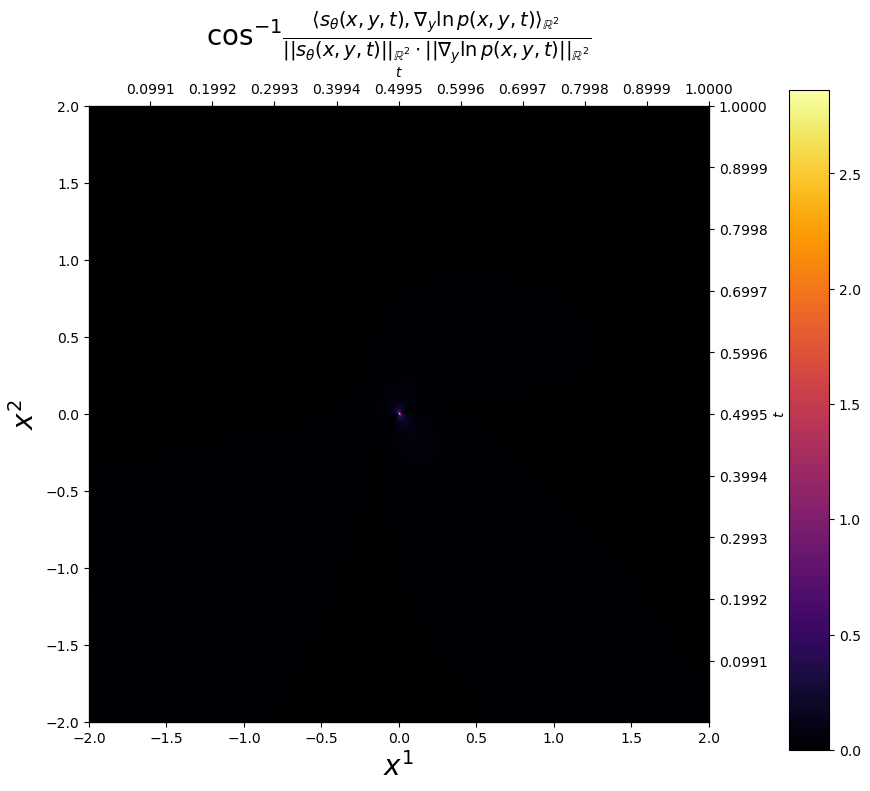

In [93]:
#Plot source: https://stackoverflow.com/questions/44594011/heat-map-on-unit-sphere
#Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
# Creating the theta and phi values
intervals = 1000

min_x = -2.0
max_x = 2.0
min_t = 1e-8
max_t = 1.0

x1 = jnp.linspace(min_x, max_x, intervals)
x2 = jnp.linspace(min_x, max_x, intervals)
t1 = jnp.linspace(min_t, max_t, intervals)

# Creating the coordinate grid for the unit sphere.
X1_heat, X2_heat = jnp.meshgrid(x1, x2)
X_heat = jnp.transpose(jnp.concatenate((X1_heat.reshape(1, intervals, intervals), 
                     X2_heat.reshape(1, intervals, intervals))), axes=(1,2,0))

theoretical_grad = lambda y,t: RN.grady_log_hk(x0, (y, jnp.zeros(1)), t)[0]
numerical_grad = lambda y,t: grady_log_model(x0, (y, jnp.zeros(1)), t)
heat_map = vmap(lambda x2,t: vmap(lambda x1: angle_between(theoretical_grad(x1,t),
                                                         numerical_grad(x1,t)))(x2))(X_heat,t1)

# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heat_map, cmap=mpl.cm.inferno, interpolation='nearest', aspect='auto',
          extent=[min_x,max_x,min_x,max_x])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_title(r'$\cos^{-1}\frac{\langle s_{\theta}(x,y,t), \nabla_{y}\ln p(x,y,t) \rangle_{\mathbb{R}^{2}}}{||s_{\theta}(x,y,t)||_{\mathbb{R}^{2}}\cdot||\nabla_{y}\ln p(x,y,t)||_{\mathbb{R}^{2}}}$',
            fontsize=20)
m = mpl.cm.ScalarMappable(cmap=mpl.cm.inferno)
m.set_array(heat_map)
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xticks(t1[-1::-100])
ax2.set_xlabel(r'$t$')
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_yticks(t1[-1::-100])
ax3.set_ylabel(r'$t$')
cax = plt.axes([1.0, 0.075, 0.05, 0.825])
fig.colorbar(m, ax=ax, cax=cax)
ax.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
fig.savefig('Figures/r2_angle.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

### Plotting the Norm Difference in $x$

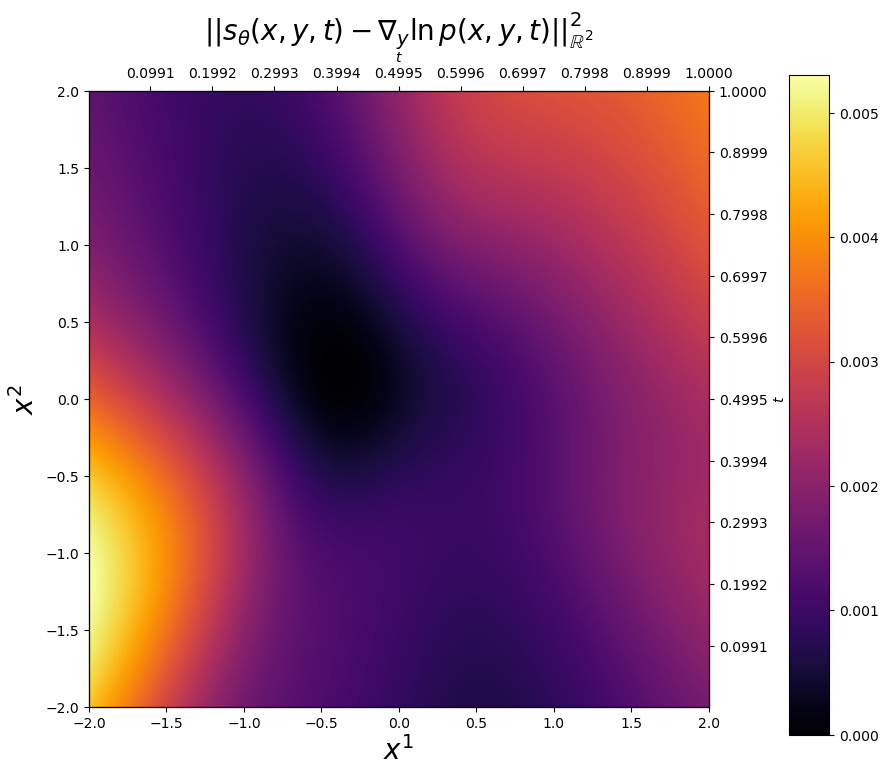

In [94]:
#Plot source: https://stackoverflow.com/questions/44594011/heat-map-on-unit-sphere

# Creating the theta and phi values
intervals = 1000

min_x = -2.0
max_x = 2.0
min_t = 1e-8
max_t = 1.0

x1 = jnp.linspace(min_x, max_x, intervals)
x2 = jnp.linspace(min_x, max_x, intervals)
t1 = jnp.linspace(min_t, max_t, intervals)

# Creating the coordinate grid for the unit sphere.
X1_heat, X2_heat = jnp.meshgrid(x1, x2)
X_heat = jnp.transpose(jnp.concatenate((X1_heat.reshape(1, intervals, intervals), 
                     X2_heat.reshape(1, intervals, intervals))), axes=(1,2,0))

theoretical_grad = lambda y,t: RN.grady_log_hk(x0, (y, jnp.zeros(1)), t)[0]
numerical_grad = lambda y,t: grady_log_model(x0, (y, jnp.zeros(1)), t)
heat_map = vmap(lambda x2,t: vmap(lambda x1: jnp.linalg.norm(theoretical_grad(x1,t)-numerical_grad(x1,t))**2)(x2))(X_heat,t1)

# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heat_map, cmap=mpl.cm.inferno, interpolation='nearest', aspect='auto',
          extent=[min_x,max_x,min_x,max_x])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_title(r'$||s_{\theta}(x,y,t)-\nabla_{y}\ln p(x,y,t)||_{\mathbb{R}^{2}}^{2}$', fontsize=20)
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xticks(t1[-1::-100])
ax2.set_xlabel(r'$t$')
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_yticks(t1[-1::-100])
ax3.set_ylabel(r'$t$')
ax.set_ylim((min_x,max_x))
ax.set_xlim((min_x,max_x))
m = mpl.cm.ScalarMappable(cmap=mpl.cm.inferno)
m.set_array(heat_map)
cax = plt.axes([1.0, 0.075, 0.05, 0.825])
fig.colorbar(m, ax=ax, cax=cax)
ax.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
fig.savefig('Figures/r2_norm.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

In [95]:
from jaxgeometry.statistics.score_matching import diffusion_mean
from jaxgeometry.setup import *

In [96]:
def s1_grad(x,y,t):
    
    return model.apply(state.params,rng_key, jnp.hstack((x[0], y[0], t)))

def s2_grad(x,y,t):
    
    ggrad = jacfwdx(lambda y: model.apply(state.params,rng_key, jnp.hstack((x[0], y[0], t))))(y)
    
    return ggrad

diffusion_mean.initialize(RN, s1_model=s1_grad, s2_model = s2_grad)

In [97]:
theta = jnp.linspace(0,2*jnp.pi, 100)

X_obs = (jnp.array([jnp.cos(theta), jnp.sin(theta)]).T, jnp.zeros(100))
x0 = (jnp.zeros(2), jnp.zeros(1))

In [98]:
mu, T, _, _ = RN.sm_dmxt(X_obs, (jnp.ones(2), jnp.zeros(1)), jnp.array([0.1]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


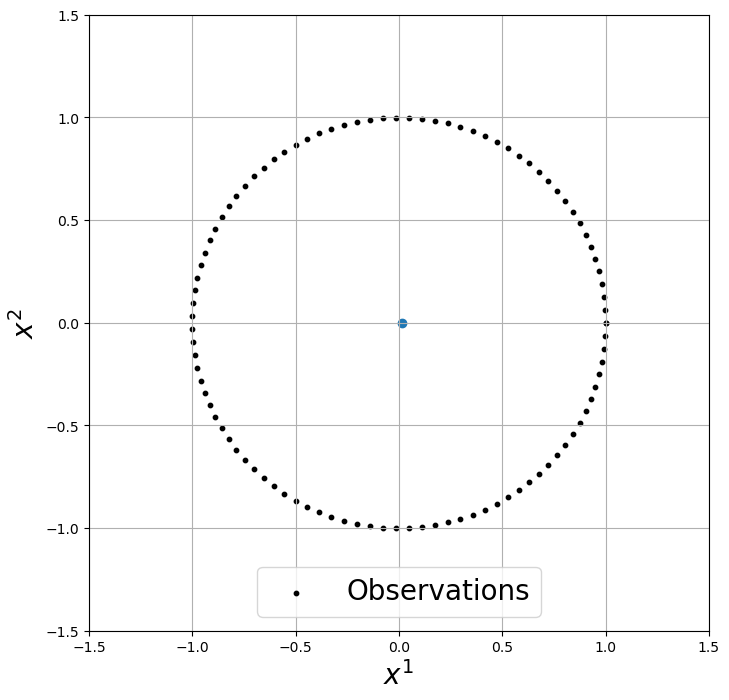

In [99]:
# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_obs[0][:,0], X_obs[0][:,1], s=10, color='black', label='Observations')
#ax.scatter(mu_true_est[0][:,0], mu_true_est[0][:,1], s=20*t_true_est, color='orange', label=r'$\nabla_{y}\ln p(x,y,t)$')
ax.scatter(mu[0][-1,0], mu[0][-1,1])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
#ax.set_title(r'Diffusion Mean Estimates')
ax.legend(loc='lower center', fontsize=20)
ax.grid()
fig.savefig('Figures/r2_estimates.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

In [100]:
print(mu)

(Array([[ 9.0000069e-01,  9.0000069e-01],
       [ 8.0841309e-01,  8.0835003e-01],
       [ 7.2375935e-01,  7.2356254e-01],
       ...,
       [ 1.5075713e-02, -4.5599029e-04],
       [ 1.5075713e-02, -4.5599029e-04],
       [ 1.5075713e-02, -4.5599029e-04]], dtype=float32), Array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0

In [101]:
print(T)

[[0.19999933]
 [0.28015476]
 [0.34686053]
 [0.4037152 ]
 [0.452934  ]
 [0.49599713]
 [0.5339575 ]
 [0.56760144]
 [0.5975378 ]
 [0.62425226]
 [0.648141  ]
 [0.6695337 ]
 [0.6887088 ]
 [0.70590436]
 [0.7213265 ]
 [0.7351547 ]
 [0.74754685]
 [0.7586423 ]
 [0.768565  ]
 [0.7774253 ]
 [0.78532195]
 [0.7923437 ]
 [0.7985701 ]
 [0.804073  ]
 [0.8089169 ]
 [0.81316036]
 [0.8168559 ]
 [0.8200512 ]
 [0.82278925]
 [0.82510895]
 [0.82704544]
 [0.8286305 ]
 [0.8298929 ]
 [0.8308585 ]
 [0.83155096]
 [0.8319915 ]
 [0.8321994 ]
 [0.8321921 ]
 [0.83198553]
 [0.831594  ]
 [0.8310306 ]
 [0.8303073 ]
 [0.829435  ]
 [0.8284237 ]
 [0.8272824 ]
 [0.8260197 ]
 [0.82464325]
 [0.8231603 ]
 [0.82157737]
 [0.8199007 ]
 [0.81813604]
 [0.8162887 ]
 [0.8143638 ]
 [0.8123659 ]
 [0.81029946]
 [0.80816865]
 [0.80597734]
 [0.8037291 ]
 [0.8014275 ]
 [0.7990756 ]
 [0.7966765 ]
 [0.7942331 ]
 [0.7917479 ]
 [0.78922355]
 [0.7866623 ]
 [0.7840663 ]
 [0.78143775]
 [0.77877843]
 [0.77609015]
 [0.77337456]
 [0.7706332 ]
 [0.76

## S2

In [67]:
file_path_s1 = 'models/R2/dsm/'
file_path_s2 = 'models/R2/s2/'

In [68]:
from jaxgeometry.statistics.score_matching import model_loader

In [69]:
state_s1 = model_loader.load_model(file_path_s1)
state_s2 = model_loader.load_model(file_path_s2)

In [70]:
#jax
import jax.numpy as jnp
from jax import vmap, Array
from jax.nn import tanh

#haiku
import haiku as hk

#random
import random

In [73]:
from train_score import RN_s1, RN_s2

@hk.transform
def s1_model(x):

    score = RN_s1(RN.dim)

    return score(x)

@hk.transform
def s2_model(x):

    score = RN_s2(RN.dim)

    return score(x)

In [74]:
def ggrady_log_model(x,y,t):
        
    return s2_model.apply(state_s2.params,rng_key, jnp.hstack((x[0], y[0], t)))

def grady_log_model(x,y,t):
    
    return s1_model.apply(state_s1.params,rng_key, jnp.hstack((x[0], y[0], t)))

def gradt_log_model(x,y,t):
    
    s1 = grady_log_model(x, y, t)
    s2 = s2_model.apply(state_s2.params, rng_key, jnp.hstack((x[0], y[0], t)))    
    div = jnp.trace(s2)+.5*jnp.dot(s1,jacfwdx(RN.logAbsDet)(x))
                                   
    return 0.5*(jnp.dot(s1, s1)+div)

In [75]:
#Source: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / jnp.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return jnp.arccos(jnp.clip(jnp.dot(v1_u, v2_u), -1.0, 1.0))

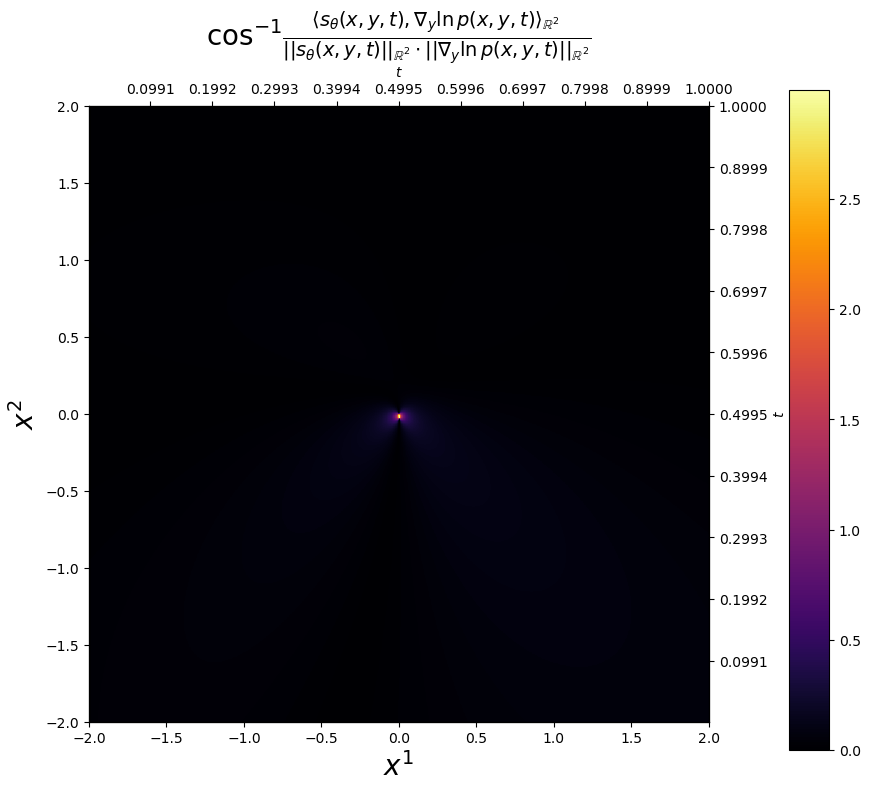

In [76]:
#Plot source: https://stackoverflow.com/questions/44594011/heat-map-on-unit-sphere
#Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
# Creating the theta and phi values
intervals = 1000

min_x = -2.0
max_x = 2.0
min_t = 1e-8
max_t = 1.0

x1 = jnp.linspace(min_x, max_x, intervals)
x2 = jnp.linspace(min_x, max_x, intervals)
t1 = jnp.linspace(min_t, max_t, intervals)

# Creating the coordinate grid for the unit sphere.
X1_heat, X2_heat = jnp.meshgrid(x1, x2)
X_heat = jnp.transpose(jnp.concatenate((X1_heat.reshape(1, intervals, intervals), 
                     X2_heat.reshape(1, intervals, intervals))), axes=(1,2,0))

theoretical_grad = lambda y,t: RN.grady_log_hk(x0, (y, jnp.zeros(1)), t)[0]
numerical_grad = lambda y,t: grady_log_model(x0, (y, jnp.zeros(1)), t)
heat_map = vmap(lambda x2,t: vmap(lambda x1: angle_between(theoretical_grad(x1,t),
                                                         numerical_grad(x1,t)))(x2))(X_heat,t1)

# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heat_map, cmap=mpl.cm.inferno, interpolation='nearest', aspect='auto',
          extent=[min_x,max_x,min_x,max_x])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_title(r'$\cos^{-1}\frac{\langle s_{\theta}(x,y,t), \nabla_{y}\ln p(x,y,t) \rangle_{\mathbb{R}^{2}}}{||s_{\theta}(x,y,t)||_{\mathbb{R}^{2}}\cdot||\nabla_{y}\ln p(x,y,t)||_{\mathbb{R}^{2}}}$',
            fontsize=20)
m = mpl.cm.ScalarMappable(cmap=mpl.cm.inferno)
m.set_array(heat_map)
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xticks(t1[-1::-100])
ax2.set_xlabel(r'$t$')
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_yticks(t1[-1::-100])
ax3.set_ylabel(r'$t$')
cax = plt.axes([1.0, 0.075, 0.05, 0.825])
fig.colorbar(m, ax=ax, cax=cax)
ax.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
fig.savefig('Figures/r2_angle.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

### Plotting the Norm Difference in $x$

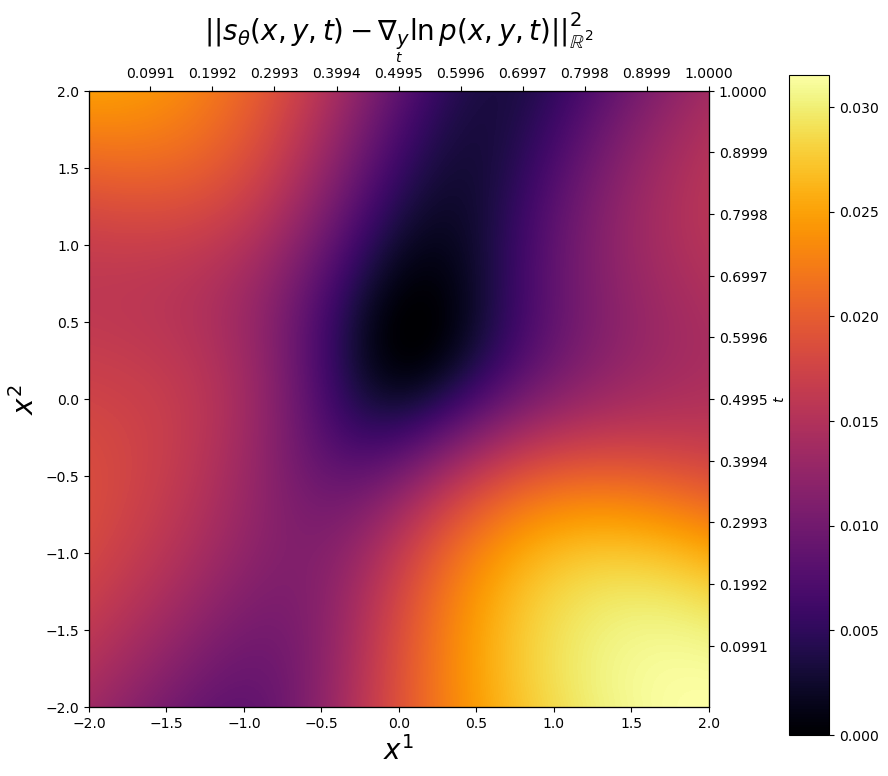

In [77]:
#Plot source: https://stackoverflow.com/questions/44594011/heat-map-on-unit-sphere

# Creating the theta and phi values
intervals = 1000

min_x = -2.0
max_x = 2.0
min_t = 1e-8
max_t = 1.0

x1 = jnp.linspace(min_x, max_x, intervals)
x2 = jnp.linspace(min_x, max_x, intervals)
t1 = jnp.linspace(min_t, max_t, intervals)

# Creating the coordinate grid for the unit sphere.
X1_heat, X2_heat = jnp.meshgrid(x1, x2)
X_heat = jnp.transpose(jnp.concatenate((X1_heat.reshape(1, intervals, intervals), 
                     X2_heat.reshape(1, intervals, intervals))), axes=(1,2,0))

theoretical_grad = lambda y,t: RN.grady_log_hk(x0, (y, jnp.zeros(1)), t)[0]
numerical_grad = lambda y,t: grady_log_model(x0, (y, jnp.zeros(1)), t)
heat_map = vmap(lambda x2,t: vmap(lambda x1: jnp.linalg.norm(theoretical_grad(x1,t)-numerical_grad(x1,t))**2)(x2))(X_heat,t1)

# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heat_map, cmap=mpl.cm.inferno, interpolation='nearest', aspect='auto',
          extent=[min_x,max_x,min_x,max_x])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_title(r'$||s_{\theta}(x,y,t)-\nabla_{y}\ln p(x,y,t)||_{\mathbb{R}^{2}}^{2}$', fontsize=20)
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xticks(t1[-1::-100])
ax2.set_xlabel(r'$t$')
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_yticks(t1[-1::-100])
ax3.set_ylabel(r'$t$')
ax.set_ylim((min_x,max_x))
ax.set_xlim((min_x,max_x))
m = mpl.cm.ScalarMappable(cmap=mpl.cm.inferno)
m.set_array(heat_map)
cax = plt.axes([1.0, 0.075, 0.05, 0.825])
fig.colorbar(m, ax=ax, cax=cax)
ax.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
fig.savefig('Figures/r2_norm.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

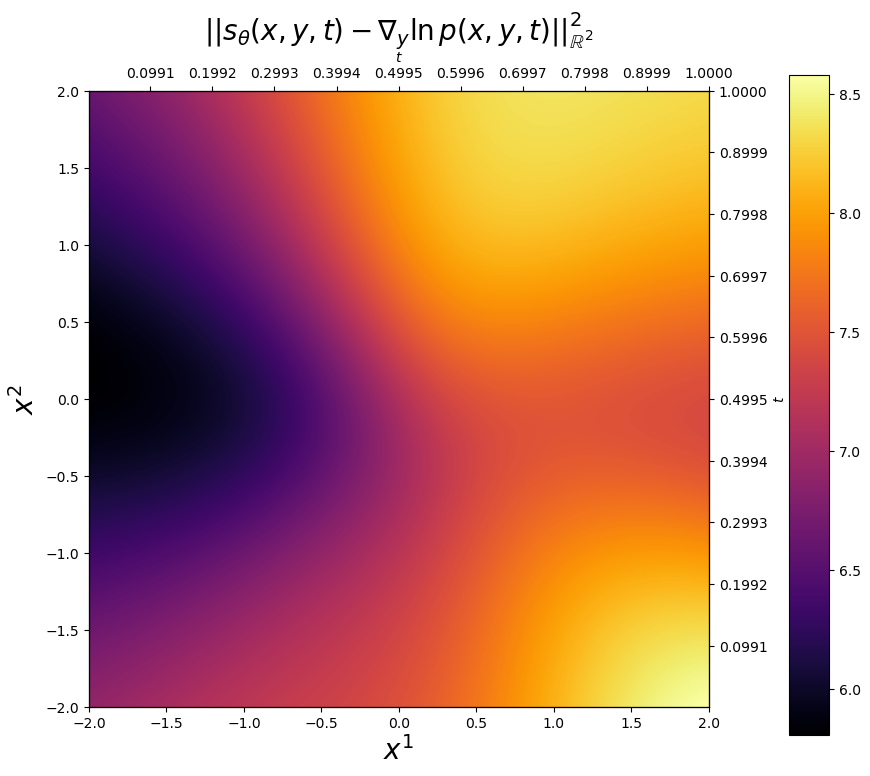

In [78]:
#Plot source: https://stackoverflow.com/questions/44594011/heat-map-on-unit-sphere

# Creating the theta and phi values
intervals = 1000

min_x = -2.0
max_x = 2.0
min_t = 1e-8
max_t = 1.0

x1 = jnp.linspace(min_x, max_x, intervals)
x2 = jnp.linspace(min_x, max_x, intervals)
t1 = jnp.linspace(min_t, max_t, intervals)

# Creating the coordinate grid for the unit sphere.
X1_heat, X2_heat = jnp.meshgrid(x1, x2)
X_heat = jnp.transpose(jnp.concatenate((X1_heat.reshape(1, intervals, intervals), 
                     X2_heat.reshape(1, intervals, intervals))), axes=(1,2,0))

theoretical_grad = lambda y,t: RN.ggrady_log_hk(x0, (y, jnp.zeros(1)), 0.5)[0]
numerical_grad = lambda y,t: ggrady_log_model(x0, (y, jnp.zeros(1)), 0.5)
heat_map = vmap(lambda x2,t: vmap(lambda x1: jnp.linalg.norm(theoretical_grad(x1,t)-numerical_grad(x1,t))**2)(x2))(X_heat,t1)

# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(heat_map, cmap=mpl.cm.inferno, interpolation='nearest', aspect='auto',
          extent=[min_x,max_x,min_x,max_x])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_title(r'$||s_{\theta}(x,y,t)-\nabla_{y}\ln p(x,y,t)||_{\mathbb{R}^{2}}^{2}$', fontsize=20)
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xticks(t1[-1::-100])
ax2.set_xlabel(r'$t$')
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_yticks(t1[-1::-100])
ax3.set_ylabel(r'$t$')
ax.set_ylim((min_x,max_x))
ax.set_xlim((min_x,max_x))
m = mpl.cm.ScalarMappable(cmap=mpl.cm.inferno)
m.set_array(heat_map)
cax = plt.axes([1.0, 0.075, 0.05, 0.825])
fig.colorbar(m, ax=ax, cax=cax)
ax.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
fig.savefig('Figures/r2_norm.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

In [79]:
print(jnp.min(heat_map))
print(jnp.max(heat_map))

5.8062506
8.579725


In [80]:
from jaxgeometry.statistics.score_matching import diffusion_mean
from jaxgeometry.setup import *

In [81]:
def s1_grad(x,y,t):
    
    return s1_model.apply(state_s1.params,rng_key, jnp.hstack((x[0], y[0], t)))

def s2_grad(x,y,t):
    
    return s2_model.apply(state_s2.params,rng_key, jnp.hstack((x[0], y[0], t))).squeeze()

diffusion_mean.initialize(RN, s1_model=s1_grad, s2_model = s2_grad)

In [82]:
diffusion_mean.initialize(RN, s1_model=s1_grad, s2_model=s2_grad)

In [83]:
theta = jnp.linspace(0,2*jnp.pi, 100)

X_obs = (jnp.array([jnp.cos(theta), jnp.sin(theta)]).T, jnp.zeros(100))
x0 = (jnp.zeros(2), jnp.zeros(1))

In [84]:
mu, T, _, _ = RN.sm_dmxt(X_obs, (jnp.ones(2), jnp.zeros(1)), jnp.array([0.2]))

In [85]:
T

Array([[0.29999936],
       [0.38767886],
       [0.4641316 ],
       [0.5309549 ],
       [0.5895789 ],
       [0.6411828 ],
       [0.6867271 ],
       [0.72700113],
       [0.7626607 ],
       [0.7942581 ],
       [0.8222639 ],
       [0.84708315],
       [0.8690677 ],
       [0.8885252 ],
       [0.905726  ],
       [0.9209089 ],
       [0.9342852 ],
       [0.94604236],
       [0.95634663],
       [0.9653457 ],
       [0.9731704 ],
       [0.9799368 ],
       [0.9857474 ],
       [0.9906928 ],
       [0.9948528 ],
       [0.9982975 ],
       [1.0010885 ],
       [1.0032798 ],
       [1.0049186 ],
       [1.0060462 ],
       [1.0066988 ],
       [1.0069083 ],
       [1.0067027 ],
       [1.0061066 ],
       [1.0051422 ],
       [1.0038295 ],
       [1.0021864 ],
       [1.0002296 ],
       [0.99797446],
       [0.99543554],
       [0.99262655],
       [0.98956066],
       [0.9862506 ],
       [0.9827085 ],
       [0.9789464 ],
       [0.9749757 ],
       [0.97080755],
       [0.966

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


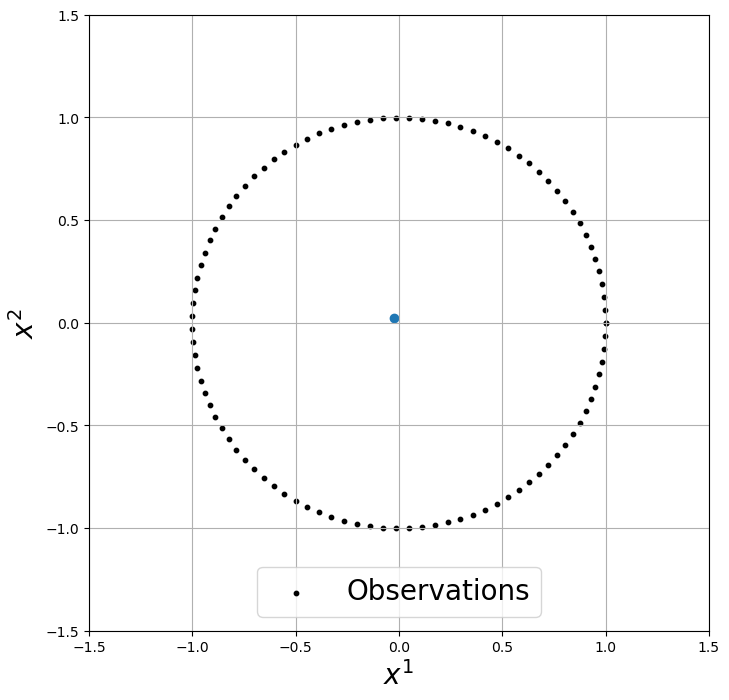

In [126]:
# Creating the plot.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_obs[0][:,0], X_obs[0][:,1], s=10, color='black', label='Observations')
#ax.scatter(mu_true_est[0][:,0], mu_true_est[0][:,1], s=20*t_true_est, color='orange', label=r'$\nabla_{y}\ln p(x,y,t)$')
ax.scatter(mu[0][-1,0], mu[0][-1,1])
ax.set_xlabel(r'$x^{1}$', fontsize=20)
ax.set_ylabel(r'$x^{2}$', fontsize=20)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
#ax.set_title(r'Diffusion Mean Estimates')
ax.legend(loc='lower center', fontsize=20)
ax.grid()
fig.savefig('Figures/r2_estimates.eps', format='eps', pad_inches=0.1, bbox_inches='tight')
#fig.tight_layout()

In [127]:
print(mu)

(Array([[ 0.9000007 ,  0.9000007 ],
       [ 0.8040544 ,  0.8044648 ],
       [ 0.7124331 ,  0.71379924],
       ...,
       [-0.02587209,  0.02497169],
       [-0.02587209,  0.02497169],
       [-0.02587209,  0.02497169]], dtype=float32), Array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
      

In [128]:
print(T)

[[0.29999933]
 [0.38769922]
 [0.46418482]
 [0.5310361 ]
 [0.58966357]
 [0.64122736]
 [0.68667066]
 [0.7267671 ]
 [0.76215935]
 [0.79338866]
 [0.8209171 ]
 [0.84514356]
 [0.8664158 ]
 [0.88503945]
 [0.9012847 ]
 [0.9153915 ]
 [0.9275738 ]
 [0.9380225 ]
 [0.94690824]
 [0.9543834 ]
 [0.9605841 ]
 [0.9656317 ]
 [0.96963423]
 [0.9726875 ]
 [0.97487634]
 [0.97627586]
 [0.976952  ]
 [0.9769628 ]
 [0.9763591 ]
 [0.9751855 ]
 [0.9734809 ]
 [0.9712794 ]
 [0.9686109 ]
 [0.9655017 ]
 [0.96197534]
 [0.95805264]
 [0.9537525 ]
 [0.94909227]
 [0.944088  ]
 [0.9387548 ]
 [0.93310714]
 [0.927159  ]
 [0.92092407]
 [0.9144157 ]
 [0.9076472 ]
 [0.90063167]
 [0.8933822 ]
 [0.88591164]
 [0.8782328 ]
 [0.87035817]
 [0.86230016]
 [0.8540707 ]
 [0.84568155]
 [0.83714396]
 [0.82846886]
 [0.8196668 ]
 [0.81074786]
 [0.8017217 ]
 [0.7925977 ]
 [0.7833849 ]
 [0.77409214]
 [0.764728  ]
 [0.7553012 ]
 [0.74582016]
 [0.7362938 ]
 [0.726731  ]
 [0.71714115]
 [0.707534  ]
 [0.69791996]
 [0.6883099 ]
 [0.6787155 ]
 [0.66

# Old version

In [11]:
#Modules

#JAX
import jax.numpy as jnp
import jax.random as jran
from jax import lax
from jax.nn import tanh

#Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

#Scipy
import scipy.io

#haiku
import haiku as hk

#JAXGeometry
from src.plotting import *
from IPython.display import clear_output
from src.Riemannian import metric, geodesic
from src.stochastics import Brownian_coords
from src.statistics import diffusion_mean
from src.Riemannian import Log
from src.stochastics import product_sde
from src.stochastics.product_sde import tile
from src.stochastics import diagonal_conditioning

In [12]:
theta = jnp.linspace(0,2*jnp.pi, 100)

X_obs = (jnp.array([jnp.cos(theta), jnp.sin(theta)]).T, jnp.zeros(100))
x0 = (jnp.zeros(2), jnp.zeros(1))

In [21]:
#Defining manifold
N = 2
M = Euclidean(N=N)
print(M)

M.F = lambda x: x[0]

metric.initialize(M)
geodesic.initialize(M)
Brownian_coords.initialize(M)
Log.initialize(M)

M.StdLog = lambda x,y: x[0]-y[0]

using M.Exp for Logarithm
Euclidean manifold of dimension 2
using M.Exp for Logarithm


In [22]:
(product,sde_product,chart_update_product) = product_sde.initialize(M,M.sde_Brownian_coords,M.chart_update_Brownian_coords)

diffusion_mean.initialize(M)
diagonal_conditioning.initialize(M,sde_product,chart_update_product)

In [27]:
theta = jnp.linspace(0,2*jnp.pi, 100)

X_obs = (jnp.array([jnp.cos(theta), jnp.sin(theta)]).T, jnp.zeros(100))
x0 = (jnp.zeros(2), jnp.zeros(1))

%time (thetas,chart,log_likelihood,log_likelihoods,mu_bridge) = M.diffusion_mean(X_obs,N=1000,num_steps=1000)

Step 0 | T: 1.130469e+01 | T: ((Array([-0.04554458, -0.0075572 ], dtype=float32), Array(0.20999993, dtype=float32)), Array([0.], dtype=float32))
Step 1 | T: 1.020404e+01 | T: ((Array([-0.03569678,  0.00196818], dtype=float32), Array(0.21992855, dtype=float32)), Array([0.], dtype=float32))
Step 2 | T: 9.269822e+00 | T: ((Array([-0.02611687,  0.01048186], dtype=float32), Array(0.22974625, dtype=float32)), Array([0.], dtype=float32))
Step 3 | T: 8.474195e+00 | T: ((Array([-0.01692625,  0.01738999], dtype=float32), Array(0.2394194, dtype=float32)), Array([0.], dtype=float32))
Step 4 | T: 7.793792e+00 | T: ((Array([-0.0082456 ,  0.02230062], dtype=float32), Array(0.24891998, dtype=float32)), Array([0.], dtype=float32))
Step 5 | T: 7.209190e+00 | T: ((Array([-0.00018695,  0.02518753], dtype=float32), Array(0.25822508, dtype=float32)), Array([0.], dtype=float32))
Step 6 | T: 6.704501e+00 | T: ((Array([0.00715443, 0.02630293], dtype=float32), Array(0.2673165, dtype=float32)), Array([0.], dtype

Step 58 | T: 2.517520e+00 | T: ((Array([0.0081712 , 0.00852277], dtype=float32), Array(0.49113688, dtype=float32)), Array([0.], dtype=float32))
Step 59 | T: 2.508973e+00 | T: ((Array([0.00863423, 0.0087316 ], dtype=float32), Array(0.49300396, dtype=float32)), Array([0.], dtype=float32))
Step 60 | T: 2.500734e+00 | T: ((Array([0.00907174, 0.00896296], dtype=float32), Array(0.49483883, dtype=float32)), Array([0.], dtype=float32))
Step 61 | T: 2.492783e+00 | T: ((Array([0.00948051, 0.00920715], dtype=float32), Array(0.49664292, dtype=float32)), Array([0.], dtype=float32))
Step 62 | T: 2.485106e+00 | T: ((Array([0.00985798, 0.0094549 ], dtype=float32), Array(0.49841753, dtype=float32)), Array([0.], dtype=float32))
Step 63 | T: 2.477688e+00 | T: ((Array([0.01020224, 0.00969769], dtype=float32), Array(0.5001639, dtype=float32)), Array([0.], dtype=float32))
Step 64 | T: 2.470515e+00 | T: ((Array([0.01051195, 0.00992795], dtype=float32), Array(0.5018832, dtype=float32)), Array([0.], dtype=floa

Step 116 | T: 2.271946e+00 | T: ((Array([0.00986977, 0.00999904], dtype=float32), Array(0.5688308, dtype=float32)), Array([0.], dtype=float32))
Step 117 | T: 2.269944e+00 | T: ((Array([0.00989606, 0.00998334], dtype=float32), Array(0.5698329, dtype=float32)), Array([0.], dtype=float32))
Step 118 | T: 2.267981e+00 | T: ((Array([0.00992121, 0.00996973], dtype=float32), Array(0.57082725, dtype=float32)), Array([0.], dtype=float32))
Step 119 | T: 2.266055e+00 | T: ((Array([0.00994501, 0.00995849], dtype=float32), Array(0.57181376, dtype=float32)), Array([0.], dtype=float32))
Step 120 | T: 2.264167e+00 | T: ((Array([0.00996727, 0.00994978], dtype=float32), Array(0.57279265, dtype=float32)), Array([0.], dtype=float32))
Step 121 | T: 2.262314e+00 | T: ((Array([0.00998782, 0.00994367], dtype=float32), Array(0.57376397, dtype=float32)), Array([0.], dtype=float32))
Step 122 | T: 2.260497e+00 | T: ((Array([0.01000657, 0.00994012], dtype=float32), Array(0.5747278, dtype=float32)), Array([0.], dtyp

Step 173 | T: 2.200657e+00 | T: ((Array([0.00999227, 0.01000472], dtype=float32), Array(0.61555094, dtype=float32)), Array([0.], dtype=float32))
Step 174 | T: 2.199933e+00 | T: ((Array([0.00999373, 0.01000465], dtype=float32), Array(0.616213, dtype=float32)), Array([0.], dtype=float32))
Step 175 | T: 2.199221e+00 | T: ((Array([0.00999513, 0.01000441], dtype=float32), Array(0.6168706, dtype=float32)), Array([0.], dtype=float32))
Step 176 | T: 2.198521e+00 | T: ((Array([0.00999646, 0.01000404], dtype=float32), Array(0.61752367, dtype=float32)), Array([0.], dtype=float32))
Step 177 | T: 2.197832e+00 | T: ((Array([0.00999772, 0.01000355], dtype=float32), Array(0.6181723, dtype=float32)), Array([0.], dtype=float32))
Step 178 | T: 2.197155e+00 | T: ((Array([0.00999888, 0.01000298], dtype=float32), Array(0.61881644, dtype=float32)), Array([0.], dtype=float32))
Step 179 | T: 2.196489e+00 | T: ((Array([0.00999995, 0.01000236], dtype=float32), Array(0.61945623, dtype=float32)), Array([0.], dtype

Step 230 | T: 2.173499e+00 | T: ((Array([0.00999967, 0.00999995], dtype=float32), Array(0.64698184, dtype=float32)), Array([0.], dtype=float32))
Step 231 | T: 2.173208e+00 | T: ((Array([0.00999975, 0.01      ], dtype=float32), Array(0.6474337, dtype=float32)), Array([0.], dtype=float32))
Step 232 | T: 2.172921e+00 | T: ((Array([0.00999983, 0.01000005], dtype=float32), Array(0.6478826, dtype=float32)), Array([0.], dtype=float32))
Step 233 | T: 2.172639e+00 | T: ((Array([0.0099999 , 0.01000009], dtype=float32), Array(0.6483285, dtype=float32)), Array([0.], dtype=float32))
Step 234 | T: 2.172361e+00 | T: ((Array([0.00999997, 0.01000012], dtype=float32), Array(0.64877146, dtype=float32)), Array([0.], dtype=float32))
Step 235 | T: 2.172087e+00 | T: ((Array([0.01000003, 0.01000014], dtype=float32), Array(0.6492116, dtype=float32)), Array([0.], dtype=float32))
Step 236 | T: 2.171818e+00 | T: ((Array([0.01000008, 0.01000016], dtype=float32), Array(0.6496488, dtype=float32)), Array([0.], dtype=

Step 287 | T: 2.162354e+00 | T: ((Array([0.01000001, 0.01000001], dtype=float32), Array(0.6685253, dtype=float32)), Array([0.], dtype=float32))
Step 288 | T: 2.162232e+00 | T: ((Array([0.01000001, 0.01000001], dtype=float32), Array(0.66883564, dtype=float32)), Array([0.], dtype=float32))
Step 289 | T: 2.162112e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.6691439, dtype=float32)), Array([0.], dtype=float32))
Step 290 | T: 2.161994e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.66945016, dtype=float32)), Array([0.], dtype=float32))
Step 291 | T: 2.161878e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6697544, dtype=float32)), Array([0.], dtype=float32))
Step 292 | T: 2.161763e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.67005664, dtype=float32)), Array([0.], dtype=float32))
Step 293 | T: 2.161650e+00 | T: ((Array([0.01000003, 0.01000002], dtype=float32), Array(0.67035687, dtype=float32)), Array([0.], dtyp

Step 344 | T: 2.157679e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6832865, dtype=float32)), Array([0.], dtype=float32))
Step 345 | T: 2.157628e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6834981, dtype=float32)), Array([0.], dtype=float32))
Step 346 | T: 2.157578e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6837082, dtype=float32)), Array([0.], dtype=float32))
Step 347 | T: 2.157528e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.68391687, dtype=float32)), Array([0.], dtype=float32))
Step 348 | T: 2.157480e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6841241, dtype=float32)), Array([0.], dtype=float32))
Step 349 | T: 2.157432e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6843299, dtype=float32)), Array([0.], dtype=float32))
Step 350 | T: 2.157385e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6845344, dtype=float32)), Array([0.], dtype=f

Step 401 | T: 2.155736e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.6932795, dtype=float32)), Array([0.], dtype=float32))
Step 402 | T: 2.155715e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.69342136, dtype=float32)), Array([0.], dtype=float32))
Step 403 | T: 2.155694e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.69356227, dtype=float32)), Array([0.], dtype=float32))
Step 404 | T: 2.155674e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.69370216, dtype=float32)), Array([0.], dtype=float32))
Step 405 | T: 2.155654e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.69384104, dtype=float32)), Array([0.], dtype=float32))
Step 406 | T: 2.155635e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6939789, dtype=float32)), Array([0.], dtype=float32))
Step 407 | T: 2.155616e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6941158, dtype=float32)), Array([0.], dtyp

Step 458 | T: 2.154951e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.6999122, dtype=float32)), Array([0.], dtype=float32))
Step 459 | T: 2.154943e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7000051, dtype=float32)), Array([0.], dtype=float32))
Step 460 | T: 2.154935e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7000973, dtype=float32)), Array([0.], dtype=float32))
Step 461 | T: 2.154927e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7001888, dtype=float32)), Array([0.], dtype=float32))
Step 462 | T: 2.154919e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7002796, dtype=float32)), Array([0.], dtype=float32))
Step 463 | T: 2.154911e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70036966, dtype=float32)), Array([0.], dtype=float32))
Step 464 | T: 2.154904e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70045906, dtype=float32)), Array([0.], dtype=

Step 515 | T: 2.154648e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70420045, dtype=float32)), Array([0.], dtype=float32))
Step 516 | T: 2.154645e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7042595, dtype=float32)), Array([0.], dtype=float32))
Step 517 | T: 2.154642e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7043181, dtype=float32)), Array([0.], dtype=float32))
Step 518 | T: 2.154639e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7043762, dtype=float32)), Array([0.], dtype=float32))
Step 519 | T: 2.154636e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.70443386, dtype=float32)), Array([0.], dtype=float32))
Step 520 | T: 2.154633e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.704491, dtype=float32)), Array([0.], dtype=float32))
Step 521 | T: 2.154630e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.70454776, dtype=float32)), Array([0.], dtype=

Step 572 | T: 2.154537e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70689, dtype=float32)), Array([0.], dtype=float32))
Step 573 | T: 2.154536e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70692635, dtype=float32)), Array([0.], dtype=float32))
Step 574 | T: 2.154535e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70696235, dtype=float32)), Array([0.], dtype=float32))
Step 575 | T: 2.154534e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70699805, dtype=float32)), Array([0.], dtype=float32))
Step 576 | T: 2.154533e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70703346, dtype=float32)), Array([0.], dtype=float32))
Step 577 | T: 2.154532e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7070685, dtype=float32)), Array([0.], dtype=float32))
Step 578 | T: 2.154531e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.70710325, dtype=float32)), Array([0.], dtype

Step 629 | T: 2.154499e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.708517, dtype=float32)), Array([0.], dtype=float32))
Step 630 | T: 2.154499e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7085386, dtype=float32)), Array([0.], dtype=float32))
Step 631 | T: 2.154498e+00 | T: ((Array([0.01000002, 0.01      ], dtype=float32), Array(0.70856, dtype=float32)), Array([0.], dtype=float32))
Step 632 | T: 2.154498e+00 | T: ((Array([0.01000002, 0.01      ], dtype=float32), Array(0.7085812, dtype=float32)), Array([0.], dtype=float32))
Step 633 | T: 2.154498e+00 | T: ((Array([0.01000002, 0.01      ], dtype=float32), Array(0.7086022, dtype=float32)), Array([0.], dtype=float32))
Step 634 | T: 2.154497e+00 | T: ((Array([0.01000002, 0.01      ], dtype=float32), Array(0.708623, dtype=float32)), Array([0.], dtype=float32))
Step 635 | T: 2.154497e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7086436, dtype=float32)), Array([0.], dtype=float3

Step 686 | T: 2.154487e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70946664, dtype=float32)), Array([0.], dtype=float32))
Step 687 | T: 2.154487e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.709479, dtype=float32)), Array([0.], dtype=float32))
Step 688 | T: 2.154487e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7094912, dtype=float32)), Array([0.], dtype=float32))
Step 689 | T: 2.154487e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7095033, dtype=float32)), Array([0.], dtype=float32))
Step 690 | T: 2.154486e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7095153, dtype=float32)), Array([0.], dtype=float32))
Step 691 | T: 2.154486e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7095271, dtype=float32)), Array([0.], dtype=float32))
Step 692 | T: 2.154486e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.70953876, dtype=float32)), Array([0.], dtype=f

Step 743 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7099984, dtype=float32)), Array([0.], dtype=float32))
Step 744 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71000516, dtype=float32)), Array([0.], dtype=float32))
Step 745 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71001184, dtype=float32)), Array([0.], dtype=float32))
Step 746 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71001846, dtype=float32)), Array([0.], dtype=float32))
Step 747 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.710025, dtype=float32)), Array([0.], dtype=float32))
Step 748 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7100315, dtype=float32)), Array([0.], dtype=float32))
Step 749 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71003795, dtype=float32)), Array([0.], dtype

Step 800 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71028423, dtype=float32)), Array([0.], dtype=float32))
Step 801 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71028787, dtype=float32)), Array([0.], dtype=float32))
Step 802 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7102915, dtype=float32)), Array([0.], dtype=float32))
Step 803 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.710295, dtype=float32)), Array([0.], dtype=float32))
Step 804 | T: 2.154483e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71029854, dtype=float32)), Array([0.], dtype=float32))
Step 805 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.710302, dtype=float32)), Array([0.], dtype=float32))
Step 806 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71030545, dtype=float32)), Array([0.], dtype=

Step 857 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7104318, dtype=float32)), Array([0.], dtype=float32))
Step 858 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.71043354, dtype=float32)), Array([0.], dtype=float32))
Step 859 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7104352, dtype=float32)), Array([0.], dtype=float32))
Step 860 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7104369, dtype=float32)), Array([0.], dtype=float32))
Step 861 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71043855, dtype=float32)), Array([0.], dtype=float32))
Step 862 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7104402, dtype=float32)), Array([0.], dtype=float32))
Step 863 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.7104419, dtype=float32)), Array([0.], dtype=

Step 914 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000003], dtype=float32), Array(0.71050394, dtype=float32)), Array([0.], dtype=float32))
Step 915 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000003], dtype=float32), Array(0.7105049, dtype=float32)), Array([0.], dtype=float32))
Step 916 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71050584, dtype=float32)), Array([0.], dtype=float32))
Step 917 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71050674, dtype=float32)), Array([0.], dtype=float32))
Step 918 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000002], dtype=float32), Array(0.71050763, dtype=float32)), Array([0.], dtype=float32))
Step 919 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7105085, dtype=float32)), Array([0.], dtype=float32))
Step 920 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.71050936, dtype=float32)), Array([0.], dty

Step 971 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01      ], dtype=float32), Array(0.71053696, dtype=float32)), Array([0.], dtype=float32))
Step 972 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7105374, dtype=float32)), Array([0.], dtype=float32))
Step 973 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.71053773, dtype=float32)), Array([0.], dtype=float32))
Step 974 | T: 2.154482e+00 | T: ((Array([0.01000002, 0.01000001], dtype=float32), Array(0.7105381, dtype=float32)), Array([0.], dtype=float32))
Step 975 | T: 2.154482e+00 | T: ((Array([0.01000001, 0.01000002], dtype=float32), Array(0.71053845, dtype=float32)), Array([0.], dtype=float32))
Step 976 | T: 2.154482e+00 | T: ((Array([0.01000001, 0.01000002], dtype=float32), Array(0.7105388, dtype=float32)), Array([0.], dtype=float32))
Step 977 | T: 2.154482e+00 | T: ((Array([0.01000001, 0.01000003], dtype=float32), Array(0.71053916, dtype=float32)), Array([0.], dtyp